In [425]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [426]:
df = pd.read_csv('train.csv')

In [427]:
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Features

In [428]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Dependent Var.

In [429]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

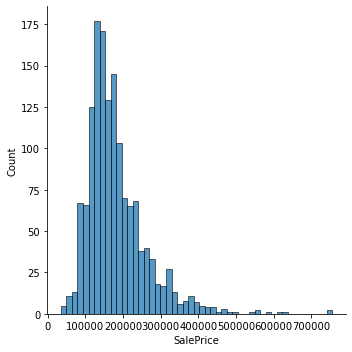

In [430]:
sns.displot(df['SalePrice'])

# Missing Value

In [431]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [432]:
Missing_values = [features for features in df.columns if df[features].isnull().sum() > 0]


for features in Missing_values:
    print(features, '-->', np.round(df[features].isnull().mean()*100, 2), '% Missing Values')

LotFrontage --> 17.74 % Missing Values
Alley --> 93.77 % Missing Values
MasVnrType --> 0.55 % Missing Values
MasVnrArea --> 0.55 % Missing Values
BsmtQual --> 2.53 % Missing Values
BsmtCond --> 2.53 % Missing Values
BsmtExposure --> 2.6 % Missing Values
BsmtFinType1 --> 2.53 % Missing Values
BsmtFinType2 --> 2.6 % Missing Values
Electrical --> 0.07 % Missing Values
FireplaceQu --> 47.26 % Missing Values
GarageType --> 5.55 % Missing Values
GarageYrBlt --> 5.55 % Missing Values
GarageFinish --> 5.55 % Missing Values
GarageQual --> 5.55 % Missing Values
GarageCond --> 5.55 % Missing Values
PoolQC --> 99.52 % Missing Values
Fence --> 80.75 % Missing Values
MiscFeature --> 96.3 % Missing Values


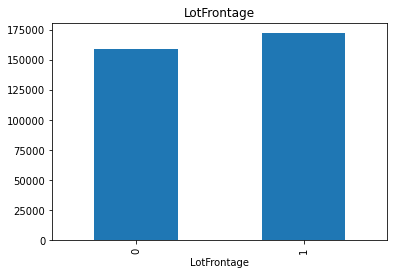

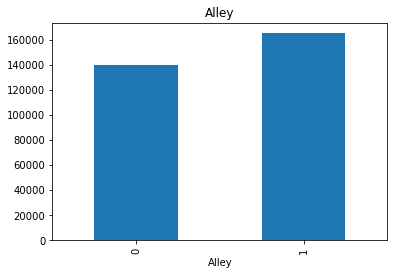

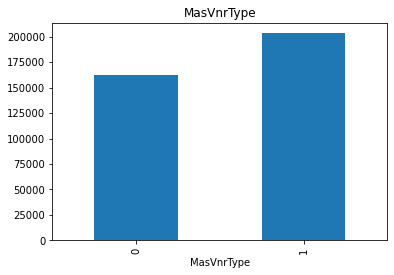

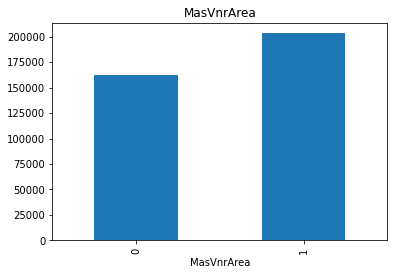

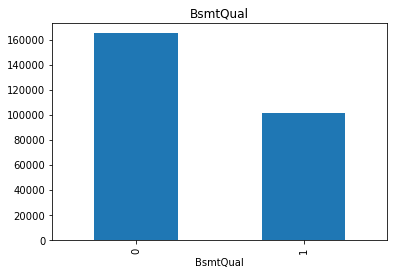

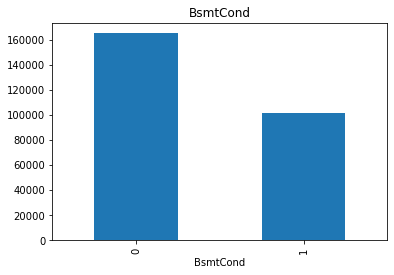

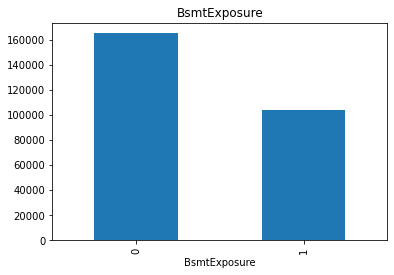

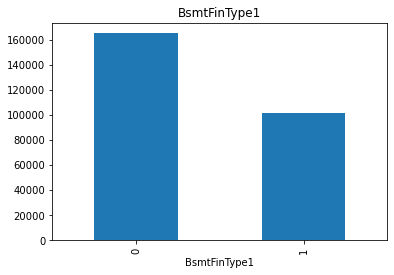

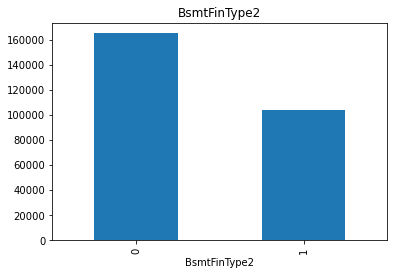

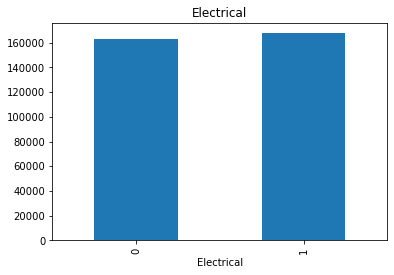

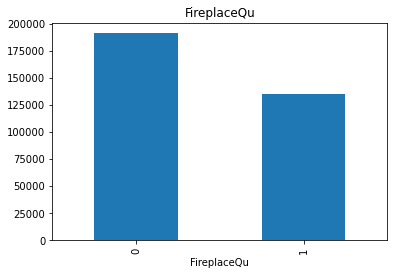

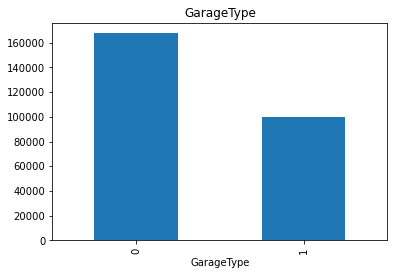

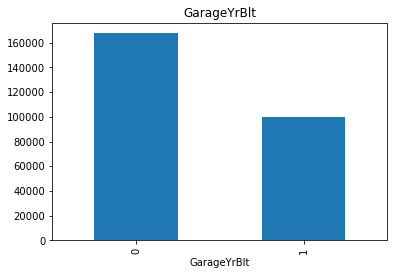

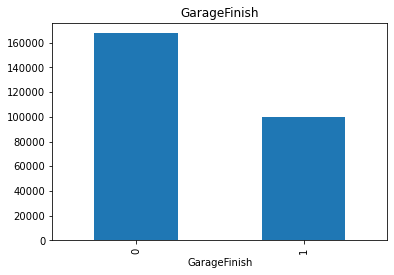

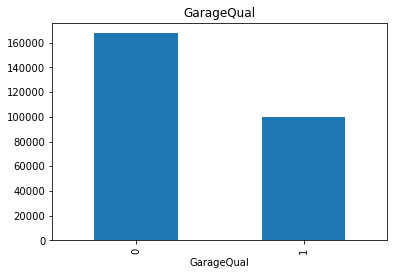

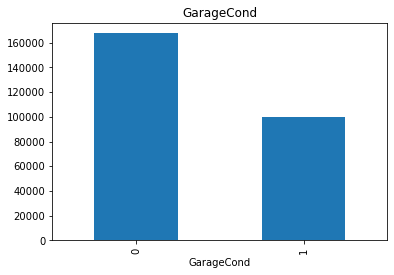

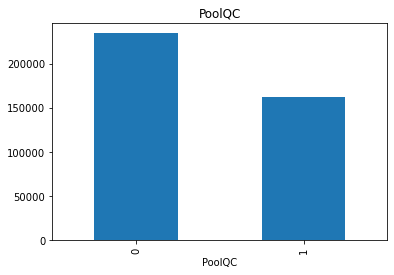

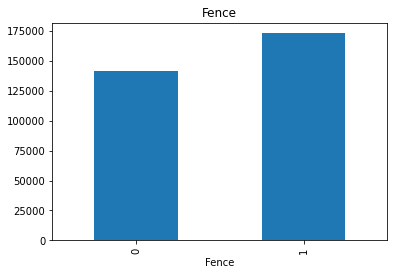

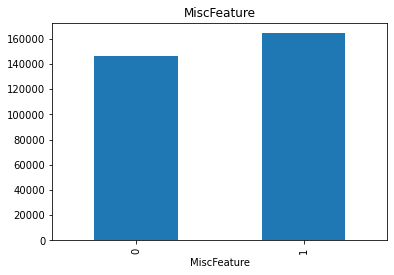

In [433]:
for features in Missing_values:
    data = df.copy()
    data[features] = np.where(data[features].isnull(), 1, 0)
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()

More MissingValues More SalePrice

In [434]:
df.drop(['Id'], axis= 1, inplace = True)

In [435]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Numerical Features

In [436]:
num_features= [features for features in df.columns if df[features].dtypes != 'O']

In [437]:
df[num_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


# Temporal Variables

In [438]:
temporal_var = [features for features in num_features if 'Yr' in features or 'Year' in features]

temporal_var

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [439]:
for features in temporal_var:
    print(features, '-->', df[features].unique())

YearBuilt --> [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd --> [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt --> [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.


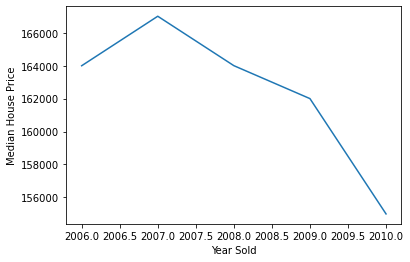

In [440]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.show()

# As Year Increases Price Decreases.

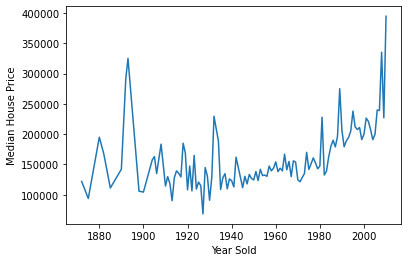

In [441]:
df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.show()

# For Large Intervals of Year Price Is almost Constant & After that price Increases.

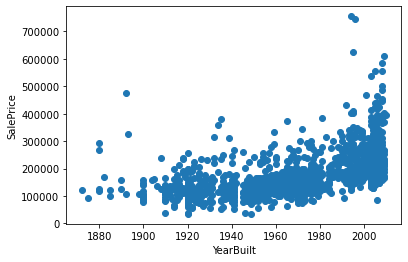

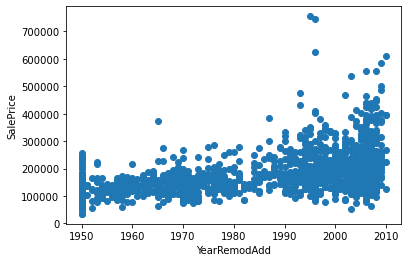

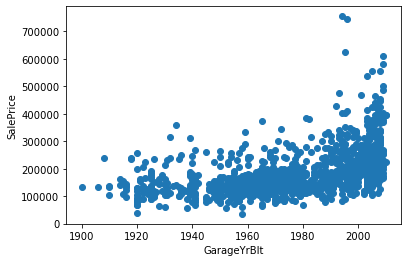

In [442]:
for features in temporal_var:
    if features != 'YrSold':
        data = df.copy()
        data[features] = data['YrSold'] - data[features]
        
        plt.scatter(df[features], df['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.show()

# Discrete Variable

In [443]:
discrete_fea = [features for features in num_features if len(df[features].unique())<20 and features not in temporal_var]

print(len(discrete_fea))
discrete_fea

14


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [444]:
df[discrete_fea].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


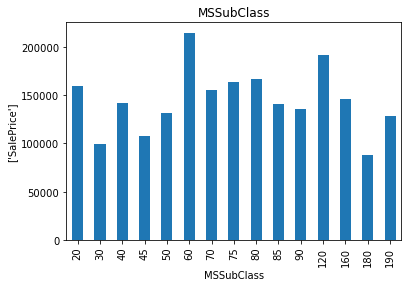

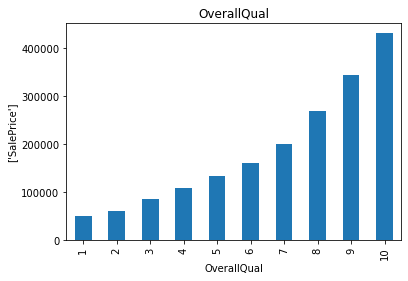

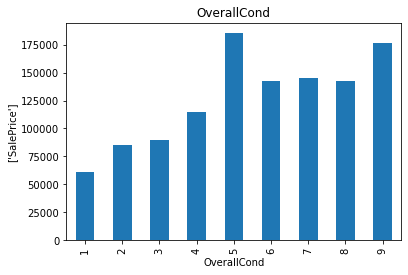

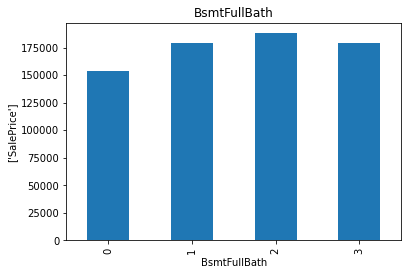

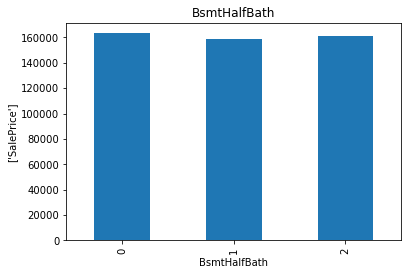

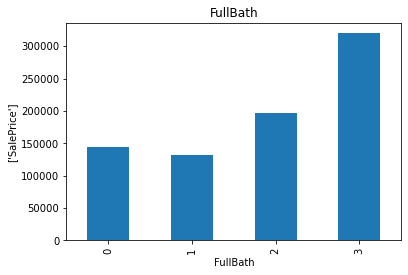

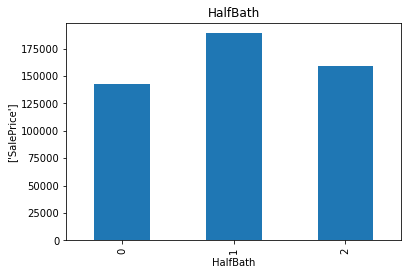

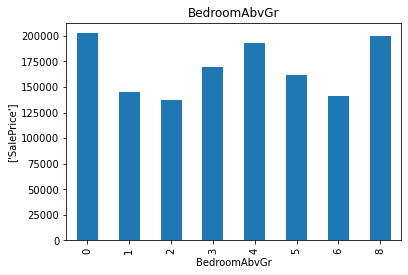

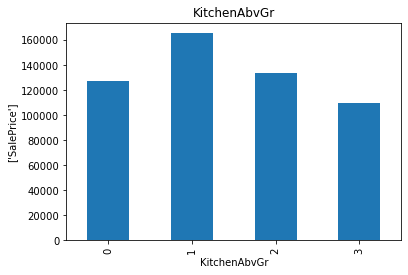

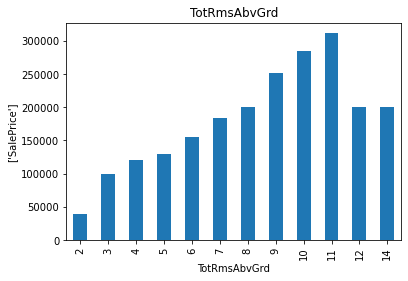

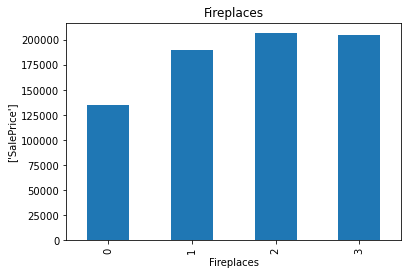

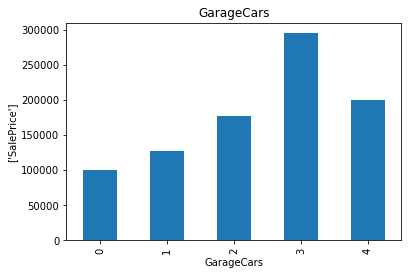

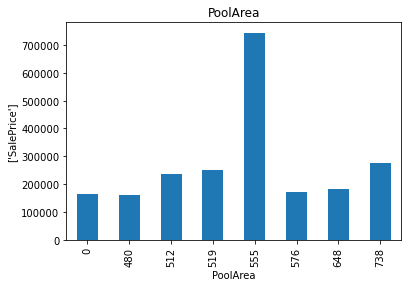

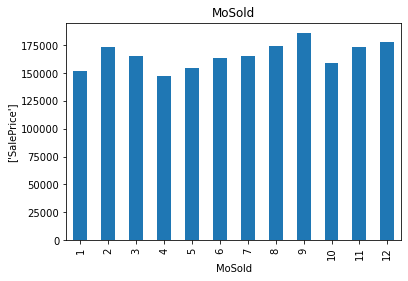

In [445]:
for features in discrete_fea:
    data = df.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel(['SalePrice'])
    plt.title(features)
    plt.show()

In [446]:
cont_features = [features for features in num_features if features not in discrete_fea + temporal_var]

print(len(cont_features))

cont_features

19


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

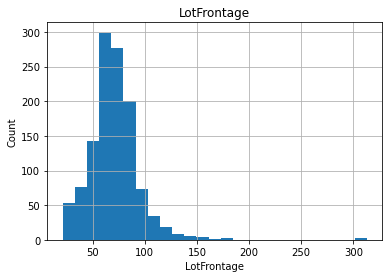

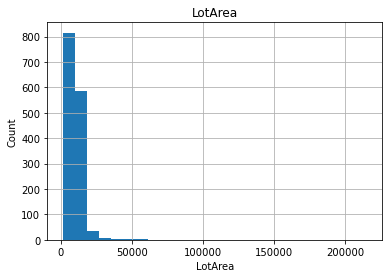

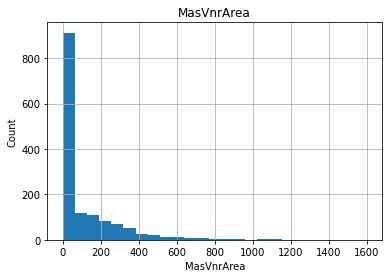

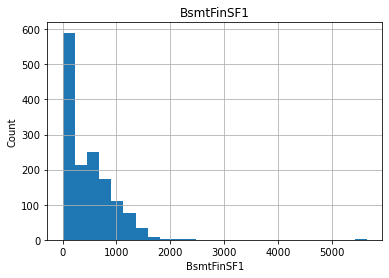

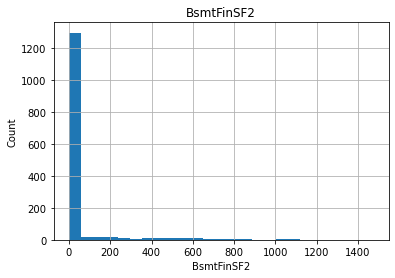

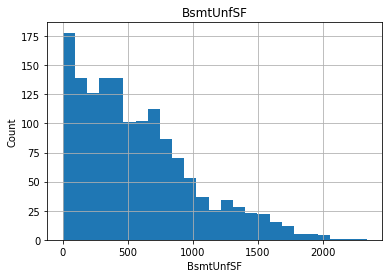

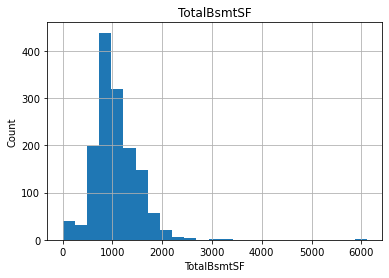

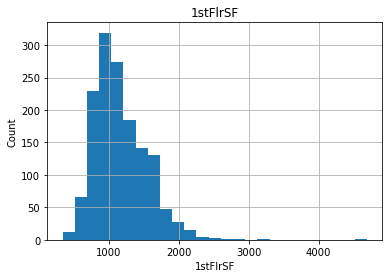

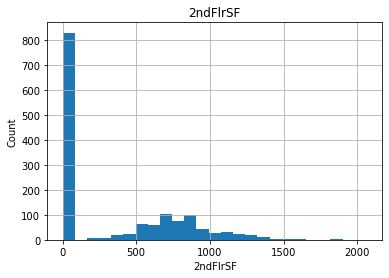

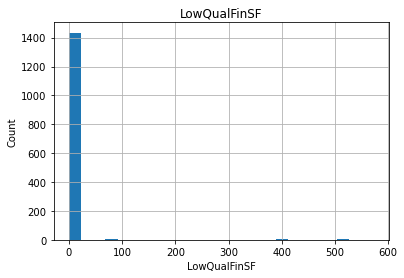

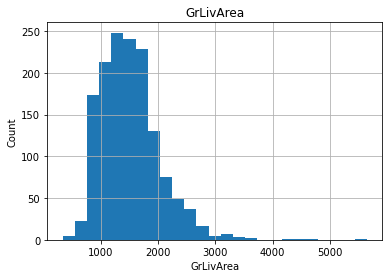

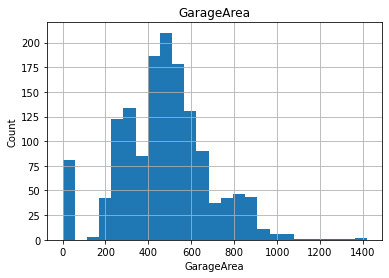

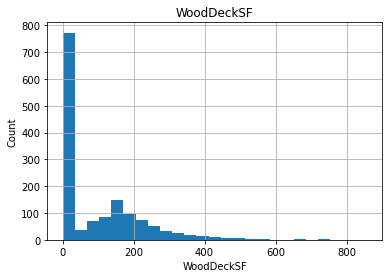

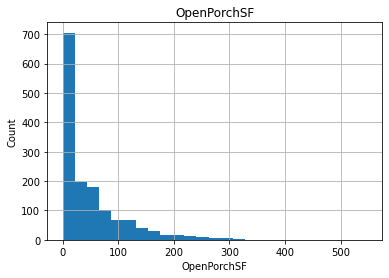

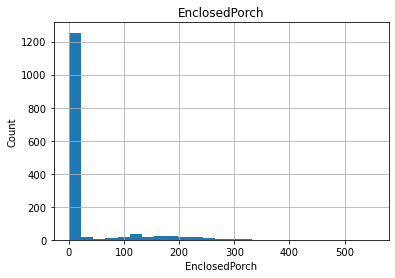

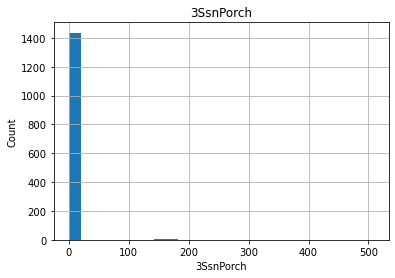

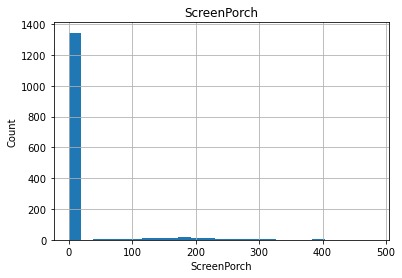

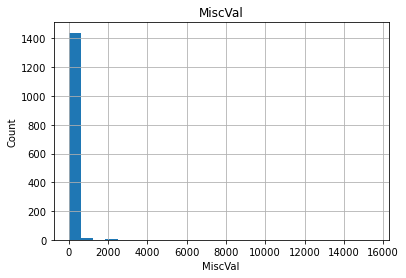

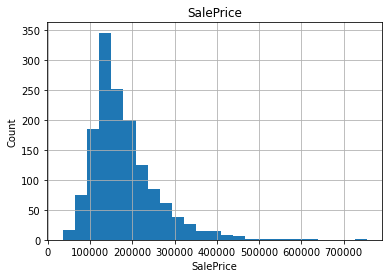

In [447]:
for features in cont_features:
    data = df.copy()
    data[features].hist(bins = 25)
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.title(features)
    plt.show()

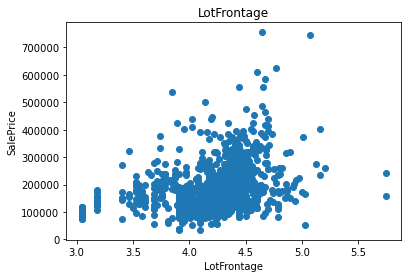

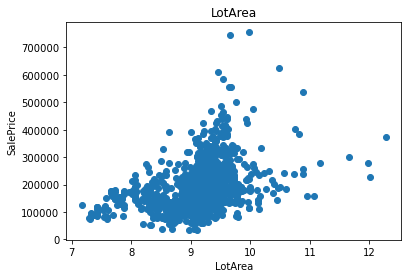

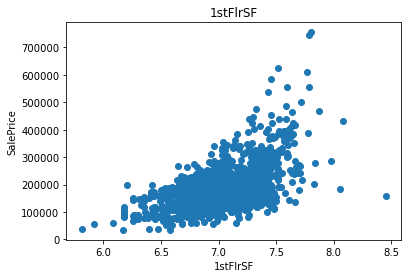

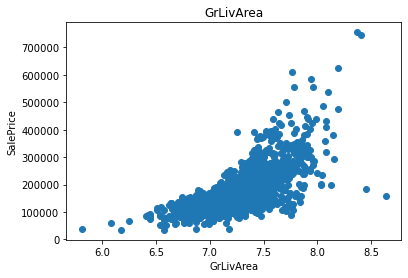

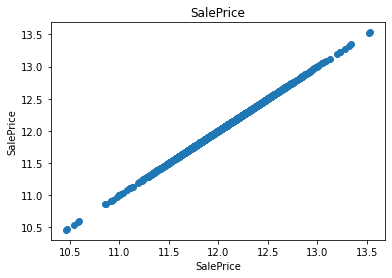

In [448]:
for features in cont_features:
    data = df.copy()
    if 0 in df[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        plt.scatter(data[features], data['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.title(features)
        plt.show()

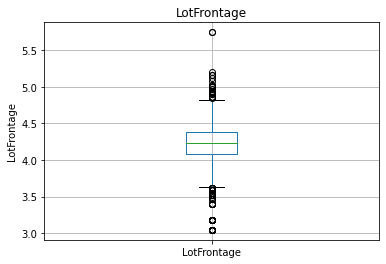

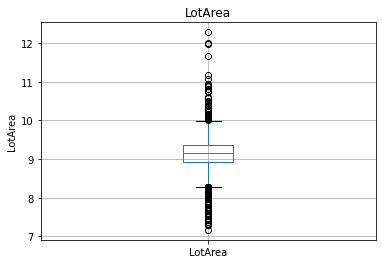

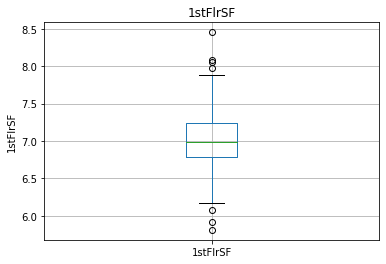

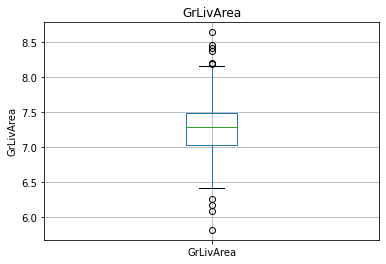

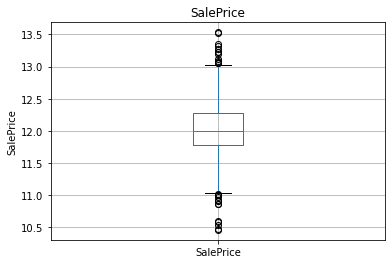

In [449]:
#df.get_values()

for features in cont_features:
    data = df.copy()
    if 0 in df[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data.boxplot(column = features)
        #plt.xlabel(features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

In [450]:
cat_features = [features for features in df.columns if df[features].dtypes == 'O']
cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [451]:
df[cat_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [452]:
for features in cat_features:
    print(features, '-->', len(df[features].unique()))

MSZoning --> 5
Street --> 2
Alley --> 3
LotShape --> 4
LandContour --> 4
Utilities --> 2
LotConfig --> 5
LandSlope --> 3
Neighborhood --> 25
Condition1 --> 9
Condition2 --> 8
BldgType --> 5
HouseStyle --> 8
RoofStyle --> 6
RoofMatl --> 8
Exterior1st --> 15
Exterior2nd --> 16
MasVnrType --> 5
ExterQual --> 4
ExterCond --> 5
Foundation --> 6
BsmtQual --> 5
BsmtCond --> 5
BsmtExposure --> 5
BsmtFinType1 --> 7
BsmtFinType2 --> 7
Heating --> 6
HeatingQC --> 5
CentralAir --> 2
Electrical --> 6
KitchenQual --> 4
Functional --> 7
FireplaceQu --> 6
GarageType --> 7
GarageFinish --> 4
GarageQual --> 6
GarageCond --> 6
PavedDrive --> 3
PoolQC --> 4
Fence --> 5
MiscFeature --> 5
SaleType --> 9
SaleCondition --> 6


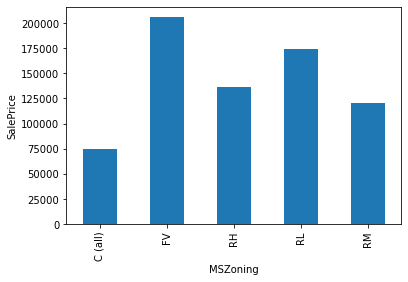

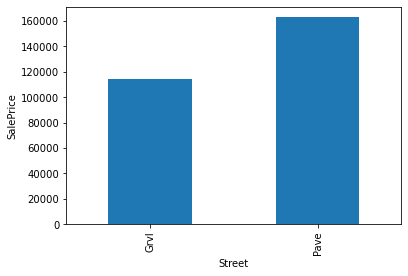

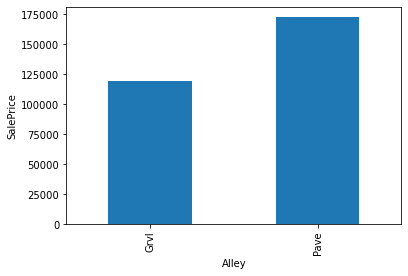

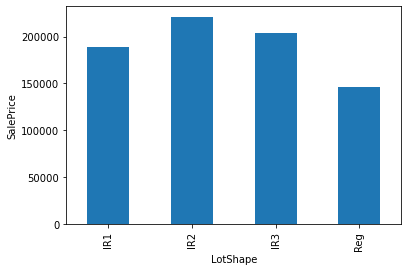

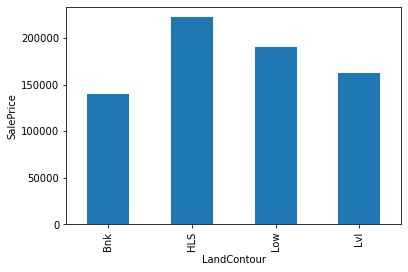

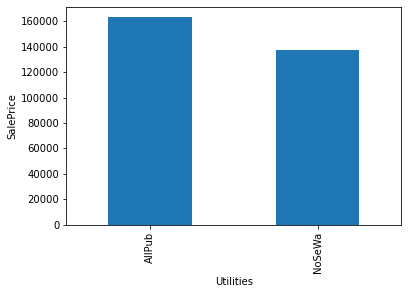

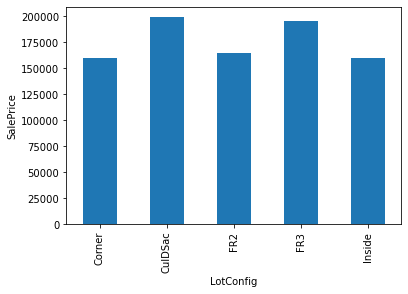

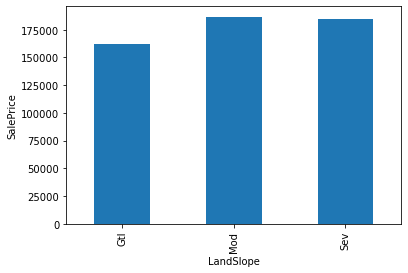

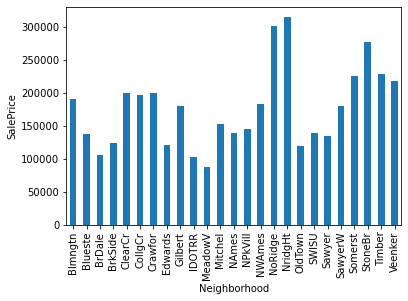

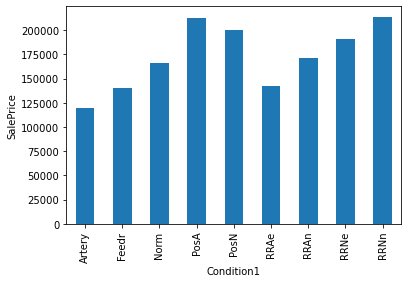

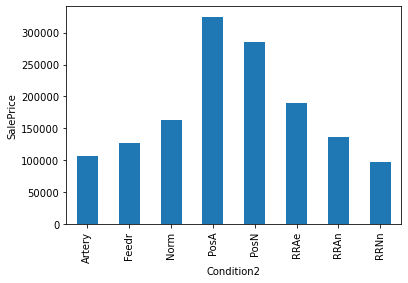

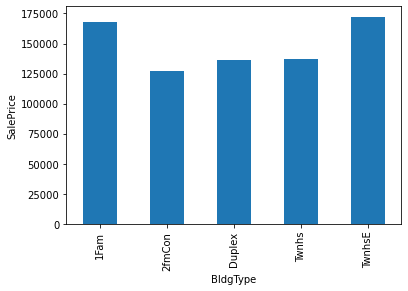

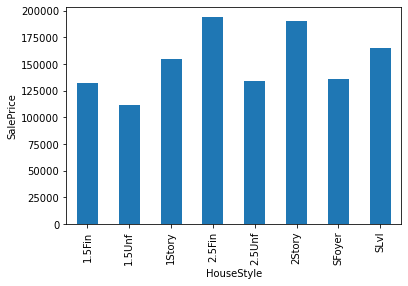

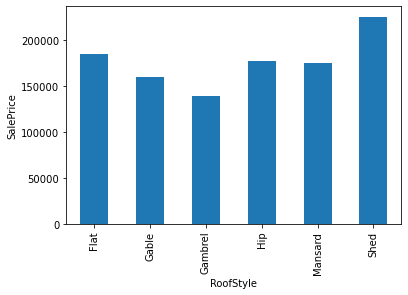

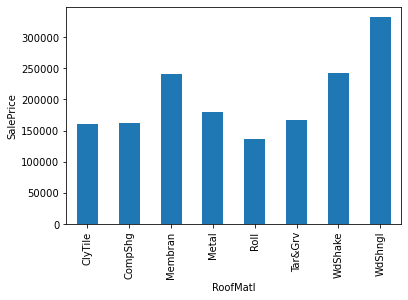

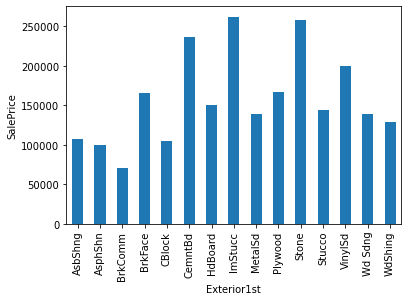

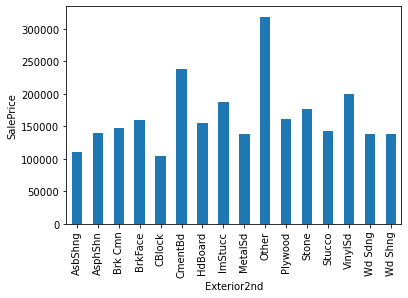

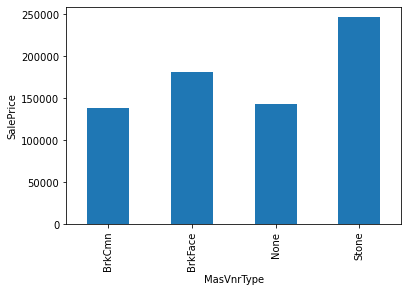

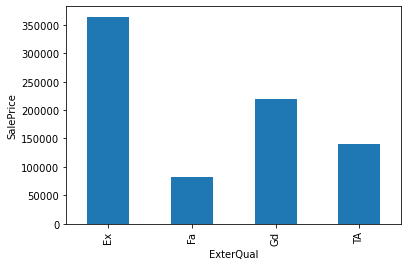

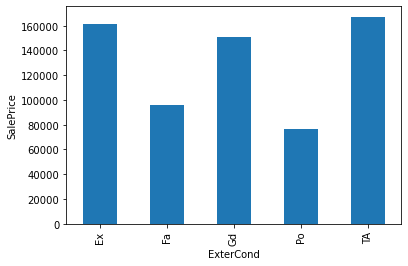

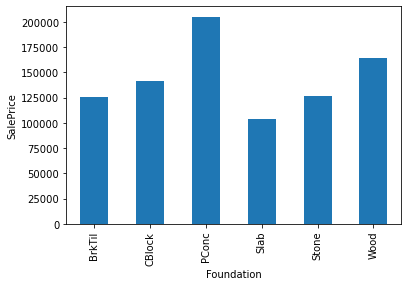

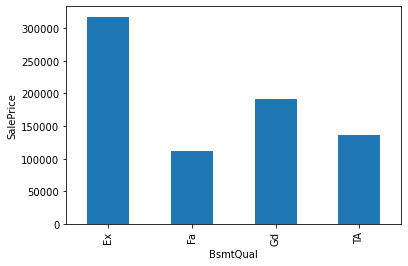

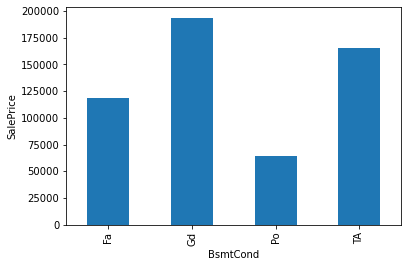

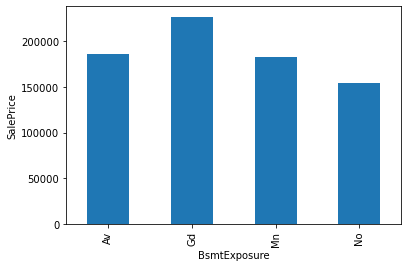

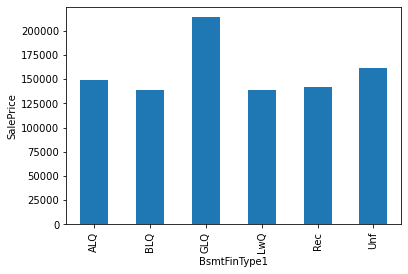

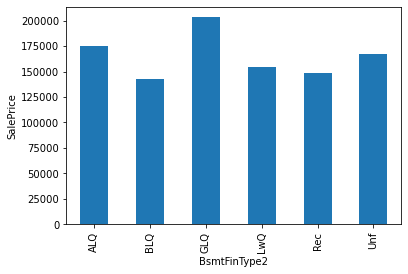

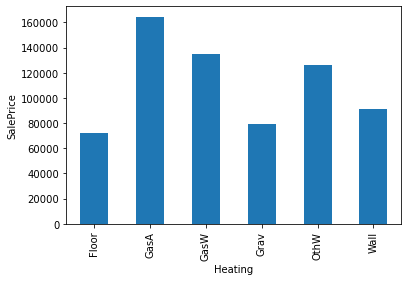

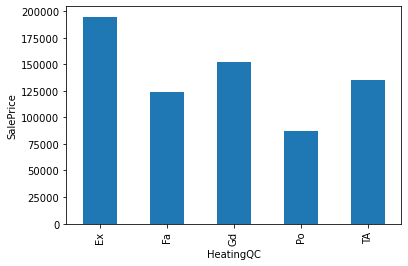

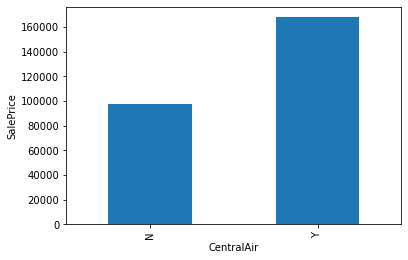

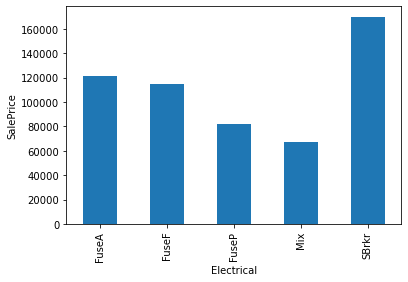

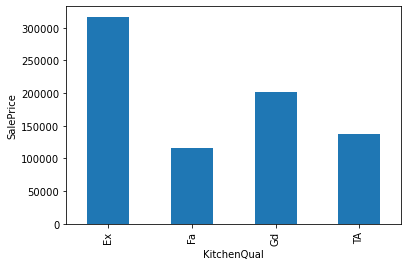

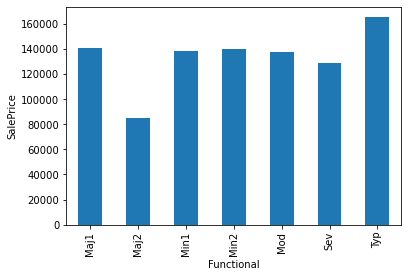

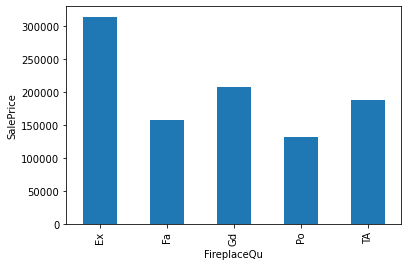

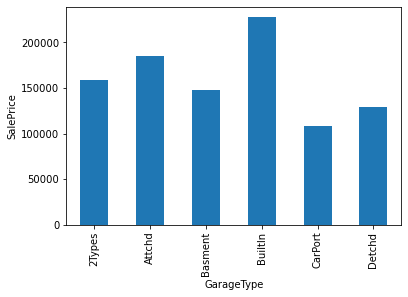

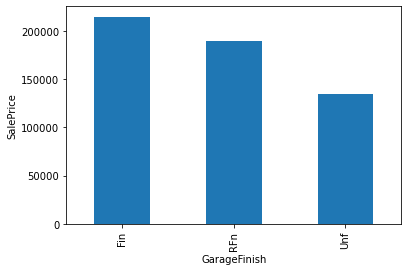

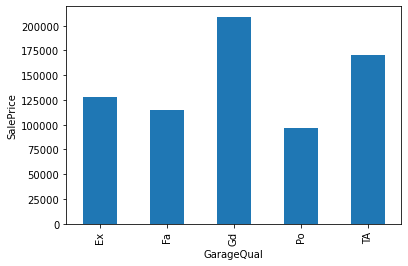

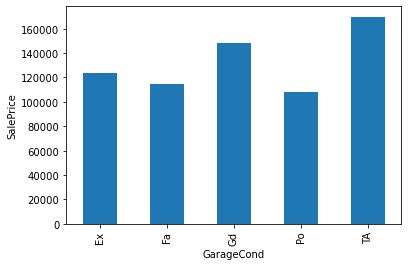

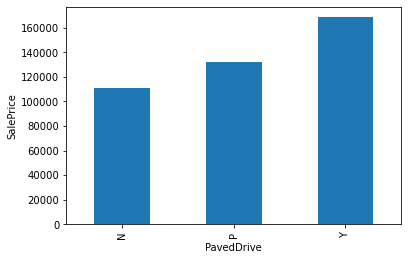

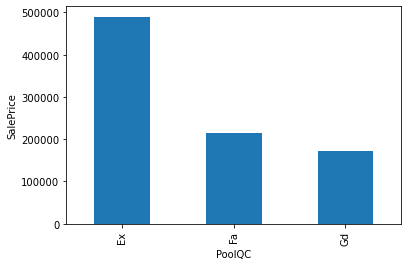

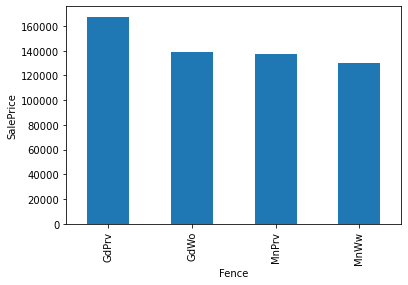

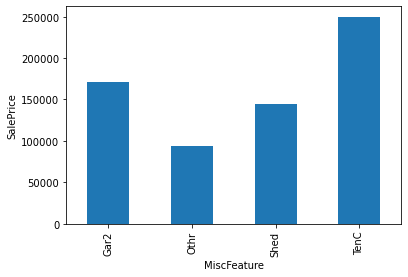

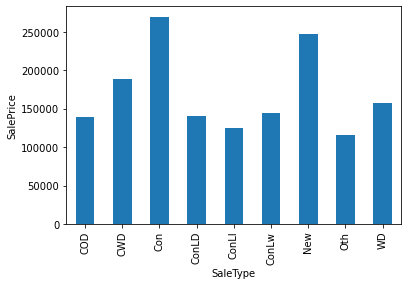

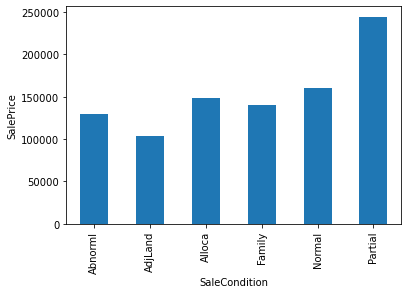

In [453]:
for features in cat_features:
    data = df.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.show()

# Feature Engineering

In [454]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [455]:
cat_missing_val = [features for features in df_train.columns if df_train[features].isnull().sum() > 0 and df_train[features].dtypes == 'O']

for features in cat_missing_val:
    print(features, '-->', np.round(df_train[features].isnull().mean()*100, 2), '%')

Alley --> 93.77 %
MasVnrType --> 0.55 %
BsmtQual --> 2.53 %
BsmtCond --> 2.53 %
BsmtExposure --> 2.6 %
BsmtFinType1 --> 2.53 %
BsmtFinType2 --> 2.6 %
Electrical --> 0.07 %
FireplaceQu --> 47.26 %
GarageType --> 5.55 %
GarageFinish --> 5.55 %
GarageQual --> 5.55 %
GarageCond --> 5.55 %
PoolQC --> 99.52 %
Fence --> 80.75 %
MiscFeature --> 96.3 %


In [456]:
cat_missing_val_test = [features for features in df_test.columns if df_test[features].isnull().sum() > 0 and df_test[features].dtypes == 'O']

for features in cat_missing_val_test:
    print(features, '-->', np.round(df_test[features].isnull().mean()*100, 2), '%')

MSZoning --> 0.27 %
Alley --> 92.67 %
Utilities --> 0.14 %
Exterior1st --> 0.07 %
Exterior2nd --> 0.07 %
MasVnrType --> 1.1 %
BsmtQual --> 3.02 %
BsmtCond --> 3.08 %
BsmtExposure --> 3.02 %
BsmtFinType1 --> 2.88 %
BsmtFinType2 --> 2.88 %
KitchenQual --> 0.07 %
Functional --> 0.14 %
FireplaceQu --> 50.03 %
GarageType --> 5.21 %
GarageFinish --> 5.35 %
GarageQual --> 5.35 %
GarageCond --> 5.35 %
PoolQC --> 99.79 %
Fence --> 80.12 %
MiscFeature --> 96.5 %
SaleType --> 0.07 %


In [457]:
def Replace_cat_missing_val(data, cat_missing_val):
    dataset = data.copy()
    dataset[cat_missing_val] = dataset[cat_missing_val].fillna('Missing')
    return dataset

df_train = Replace_cat_missing_val(df_train, cat_missing_val)
df_train[cat_missing_val].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [458]:
df_test = Replace_cat_missing_val(df_test, cat_missing_val_test)
df_test[cat_missing_val_test].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [459]:
num_missing_val = [features for features in df_train.columns if df_train[features].isnull().sum()>0 and df_train[features].dtypes != 'O']

for features in num_missing_val:
    print(features, '-->', np.round(df_train[features].isnull().mean()*100, 2), '%')

LotFrontage --> 17.74 %
MasVnrArea --> 0.55 %
GarageYrBlt --> 5.55 %


In [460]:
num_missing_val_test = [features for features in df_test.columns if df_test[features].isnull().sum()>0 and df_test[features].dtypes != 'O']

for features in num_missing_val_test:
    print(features, '-->', np.round(df_test[features].isnull().mean()*100, 2), '%')

LotFrontage --> 15.56 %
MasVnrArea --> 1.03 %
BsmtFinSF1 --> 0.07 %
BsmtFinSF2 --> 0.07 %
BsmtUnfSF --> 0.07 %
TotalBsmtSF --> 0.07 %
BsmtFullBath --> 0.14 %
BsmtHalfBath --> 0.14 %
GarageYrBlt --> 5.35 %
GarageCars --> 0.07 %
GarageArea --> 0.07 %


In [461]:
for features in num_missing_val:
    median_values = df_train[features].median()
    df_train[features+'nan'] = np.where(df_train[features].isnull(), 1, 0)
    df_train[features].fillna(median_values, inplace = True)
    
df_train[num_missing_val].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [462]:
for features in num_missing_val_test:
    median_values = df_test[features].median()
    df_test[features+'nan'] = np.where(df_test[features].isnull(), 1, 0)
    df_test[features].fillna(median_values, inplace = True)
    
df_test[num_missing_val_test].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [463]:
#Temporal Var

for features in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df_train[features] = df_train['YrSold'] - df_train[features]

In [464]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420

In [465]:
df_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [466]:
#Temporal Var Test

for features in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df_test[features] = df_test['YrSold'] - df_test[features]

In [467]:
df_test[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [468]:
#num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

#for features in num_features:
 #   df_train[features] = np.log(df_train[features])

In [469]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [470]:
#num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

#for features in num_features:
 #   df_test[features] = np.log(df_test[features])

In [471]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


# Handling Rare Catogrical Features

In [472]:
cat_features = [features for features in df_train.columns if df_train[features].dtypes == 'O']

cat_features_test = [features for features in df_test.columns if df_test[features].dtypes == 'O']

In [473]:
for features in cat_features:
    temp = df_train.groupby(features)['SalePrice'].count()/len(data)
    temp_df = temp[temp > 0.01].index
    df_train[features] = np.where(df_train[features].isin(temp_df), df_train[features], 'Rare_var')
    

In [474]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [475]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train_encoded = pd.DataFrame()
for features in cat_features:
    df_train_encoded[features] = df_train[features].copy()

for cols in df_train_encoded.columns:
    df_train_encoded[cols] = le.fit_transform(df_train_encoded[cols])
    
df_train_encoded.head()

for feature in cat_features:
    df_train = df_train.drop([feature], axis = 1)
    #df_train = pd.concat([df_train, df[feature]], axis = 1)
    
df_train = pd.concat([df_train, df_train_encoded], axis = 1)
    
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,5,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,5.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,2,0,1,3,3,0,3,0,4,2,0,0,2,0,0,8,8,1,1,3,2,2,4,4,2,6,0,0,1,3,2,4,3,0,2,3,3,2,0,2,0,3,2
1,2,20,80.0,9600,6,8,31,31,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,31.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,2,0,1,3,3,0,2,0,16,1,0,0,1,0,0,4,4,2,3,3,1,2,4,1,0,6,0,0,1,3,3,4,5,0,2,3,3,2,0,2,0,3,2
2,3,60,68.0,11250,7,5,7,6,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,7.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,2,0,1,0,3,0,3,0,4,2,0,0,2,0,0,8,8,1,1,3,2,2,4,3,2,6,0,0,1,3,2,4,5,0,2,3,3,2,0,2,0,3,2
3,4,70,60.0,9550,7,5,91,36,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,8.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,2,0,1,0,3,0,0,0,5,2,0,0,2,0,0,9,10,2,3,3,0,4,1,4,0,6,0,2,1,3,2,4,2,3,3,3,3,2,0,2,0,3,0
4,5,60,84.0,14260,8,5,8,8,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,8.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,2,0,1,0,3,0,2,0,13,2,0,0,2,0,0,8,8,1,1,3,2,2,4,0,2,6,0,0,1,3,2,4,5,0,2,3,3,2,0,2,0,3,2


In [476]:
df_test_encoded = pd.DataFrame()
for features in cat_features_test:
    df_test_encoded[features] = df_test[features].copy()

for cols in df_test_encoded.columns:
    df_test_encoded[cols] = le.fit_transform(df_test_encoded[cols])
    
df_test_encoded.head()

for feature in cat_features_test:
    df_test = df_test.drop([feature], axis = 1)
    #df_train = pd.concat([df_train, df[feature]], axis = 1)
    
df_test = pd.concat([df_test, df_test_encoded], axis = 1)
    
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461,20,80.0,11622,5,6,49,49,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,49.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,0,4,0,12,1,2,0,2,1,0,11,13,3,3,4,1,4,4,4,5,3,0,4,1,3,4,7,3,1,3,4,5,2,2,3,1,9,4
1,1462,20,81.0,14267,6,6,52,52,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,52.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,3,0,0,0,12,2,2,0,2,3,0,12,14,1,3,4,1,4,4,4,0,6,0,4,1,3,2,7,3,1,3,4,5,2,2,2,0,9,4
2,1463,60,74.0,13830,5,5,13,12,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,13.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,3,0,4,0,8,2,2,0,4,1,0,11,13,3,3,4,2,2,4,4,2,6,0,2,1,3,4,7,5,1,0,4,5,2,2,3,1,9,4
3,1464,60,78.0,9978,6,6,12,12,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,12.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,3,0,4,0,8,2,2,0,4,1,0,11,13,1,3,4,2,4,4,4,2,6,0,0,1,3,2,7,2,1,0,4,5,2,2,2,1,9,4
4,1465,120,43.0,5005,8,5,18,18,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,18.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,1,0,4,0,22,2,2,4,2,1,0,6,6,3,2,4,2,2,4,4,0,6,0,0,1,3,2,7,3,1,2,4,5,2,2,2,1,9,4


# Feature Scaling

In [477]:
feature_scaling = [features for features in df_train.columns if features not in ['Id', 'SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train[feature_scaling])

MinMaxScaler()

In [478]:
df_train = pd.concat([df_train[['Id', 'SalePrice']].reset_index(drop = True), pd.DataFrame(scaler.transform(df_train[feature_scaling]), columns = feature_scaling)], axis = 1)


In [479]:
df_train.head()

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,208500,0.235294,0.150685,0.033420,0.666667,0.500,0.036765,0.098361,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.046729,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,0.0,0.5,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.0,0.0,0.8,0.8,0.25,0.333333,1.0,0.50,0.5,1.00,1.00,0.333333,1.0,0.0,0.0,1.0,1.0,0.666667,1.0,0.6,0.0,0.666667,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.5
1,2,181500,0.000000,0.202055,0.038795,0.555556,0.875,0.227941,0.524590,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.289720,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.0,0.0,0.0,0.5,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.0,0.0,0.4,0.4,0.50,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,1.0,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.666667,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.5
2,3,223500,0.235294,0.160959,0.046507,0.666667,0.500,0.051471,0.114754,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.065421,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.0,0.0,0.0,0.5,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.0,0.0,0.8,0.8,0.25,0.333333,1.0,0.50,0.5,1.00,0.75,0.333333,1.0,0.0,0.0,1.0,1.0,0.666667,1.0,1.0,0.0,0.666667,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.5
3,4,140000,0.294118,0.133562,0.038561,0.666667,0.500,0.669118,0.606557,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.074766,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.0,0.0,0.0,0.5,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.0,0.0,0.9,1.0,0.50,1.000000,1.0,0.00,1.0,0.25,1.00,0.000000,1.0,0.0,0.5,1.0,1.0,0.666667,1.0,0.4,0.6,1.000000,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.0
4,5,250000,0.235294,0.215753,0.060576,0.777778,0.500,0.058824,0.147541,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.074766,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.0,0.0,0.0,0.5,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.0,0.0,0.8,0.8,0.25,0.333333,1.0,0.50,0.5,1.00,0.00,0.333333,1.0,0.0,0.0,1.0,1.0,0.666667,1.0,1.0,0.0,0.666667,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.5


In [480]:
feature_scaling = [features for features in df_test.columns if features not in ['Id']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_test[feature_scaling])

df_test = pd.concat([df_test[['Id']].reset_index(drop = True), pd.DataFrame(scaler.transform(df_test[feature_scaling]), columns = feature_scaling)], axis = 1)

df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461,0.000000,0.329609,0.184147,0.444444,0.625,0.384615,0.822581,0.000000,0.116708,0.094364,0.126168,0.173111,0.104309,0.000000,0.0,0.104309,0.0,0.0,0.25,0.0,0.333333,0.5,0.166667,0.00,0.792994,0.2,0.490591,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,1.0,0.5,1.0,1.000000,0.0,1.0,0.0,0.500000,0.125,0.5,0.0,0.333333,0.2,0.0,0.846154,0.866667,0.75,1.000000,1.0,0.2,1.0,1.0,1.0,0.833333,0.5,0.0,1.0,1.0,1.0,1.0,1.0,0.6,0.166667,1.000000,1.0,1.0,1.0,1.0,0.75,0.333333,1.0,0.8
1,1462,0.000000,0.335196,0.232124,0.555556,0.625,0.407692,0.870968,0.083721,0.230175,0.000000,0.189720,0.260844,0.196672,0.000000,0.0,0.196672,0.0,0.0,0.25,0.5,0.500000,0.5,0.250000,0.00,0.802548,0.2,0.209677,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.5,0.0,1.000000,0.0,0.0,0.0,0.500000,0.250,0.5,0.0,0.333333,0.6,0.0,0.923077,0.933333,0.25,1.000000,1.0,0.2,1.0,1.0,1.0,0.000000,1.0,0.0,1.0,1.0,1.0,0.5,1.0,0.6,0.166667,1.000000,1.0,1.0,1.0,1.0,0.50,0.000000,1.0,0.8
2,1463,0.235294,0.296089,0.224197,0.444444,0.500,0.107692,0.225806,0.000000,0.197257,0.000000,0.064019,0.182139,0.111135,0.376477,0.0,0.260666,0.0,0.0,0.50,0.5,0.500000,0.5,0.250000,0.25,0.678344,0.4,0.323925,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.2,0.0,0.846154,0.866667,0.75,1.000000,1.0,0.4,0.5,1.0,1.0,0.333333,1.0,0.0,0.5,1.0,1.0,1.0,1.0,1.0,0.166667,0.000000,1.0,1.0,1.0,1.0,0.75,0.333333,1.0,0.8
3,1464,0.235294,0.318436,0.154326,0.555556,0.625,0.100000,0.225806,0.015504,0.150125,0.000000,0.151402,0.181747,0.110708,0.364125,0.0,0.255333,0.0,0.0,0.50,0.5,0.500000,0.5,0.333333,0.25,0.675159,0.4,0.315860,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.2,0.0,0.846154,0.866667,0.25,1.000000,1.0,0.4,1.0,1.0,1.0,0.333333,1.0,0.0,0.0,1.0,1.0,0.5,1.0,0.4,0.166667,0.000000,1.0,1.0,1.0,1.0,0.50,0.333333,1.0,0.8
4,1465,0.588235,0.122905,0.064121,0.777778,0.500,0.146154,0.322581,0.000000,0.065586,0.000000,0.475234,0.251227,0.186220,0.000000,0.0,0.186220,0.0,0.0,0.50,0.0,0.333333,0.5,0.166667,0.00,0.694268,0.4,0.340054,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.5,0.0,0.333333,0.0,1.0,0.0,0.916667,0.250,0.5,1.0,0.333333,0.2,0.0,0.461538,0.400000,0.75,0.666667,1.0,0.4,0.5,1.0,1.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.5,1.0,0.6,0.166667,0.666667,1.0,1.0,1.0,1.0,0.50,0.333333,1.0,0.8


# Feature Selection

In [481]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [482]:
X_train = df_train.drop(['SalePrice'], axis = 1)
y_train = df_train['SalePrice']

feature_selection = SelectFromModel(Lasso(alpha = 0.005, random_state=1))
feature_selection.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=1))

In [483]:
feature_selection.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [484]:
selected_feat = X_train.columns[(feature_selection.get_support())]

In [485]:
print('Total Features -->', X_train.shape[1])
print('Selected Features -->', len(selected_feat))

Total Features --> 83
Selected Features --> 83


In [486]:
selected_feat

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'LotFrontagenan', 'MasVnrAreanan',
       'GarageYrBltnan', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinTyp

In [487]:
X_train = X_train[selected_feat]
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,0.235294,0.150685,0.033420,0.666667,0.500,0.036765,0.098361,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.046729,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,0.0,0.5,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.0,0.0,0.8,0.8,0.25,0.333333,1.0,0.50,0.5,1.00,1.00,0.333333,1.0,0.0,0.0,1.0,1.0,0.666667,1.0,0.6,0.0,0.666667,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.5
1,2,0.000000,0.202055,0.038795,0.555556,0.875,0.227941,0.524590,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.289720,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.0,0.0,0.0,0.5,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.0,0.0,0.4,0.4,0.50,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,1.0,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.666667,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.5
2,3,0.235294,0.160959,0.046507,0.666667,0.500,0.051471,0.114754,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.065421,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.0,0.0,0.0,0.5,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.0,0.0,0.8,0.8,0.25,0.333333,1.0,0.50,0.5,1.00,0.75,0.333333,1.0,0.0,0.0,1.0,1.0,0.666667,1.0,1.0,0.0,0.666667,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.5
3,4,0.294118,0.133562,0.038561,0.666667,0.500,0.669118,0.606557,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.074766,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.0,0.0,0.0,0.5,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.0,0.0,0.9,1.0,0.50,1.000000,1.0,0.00,1.0,0.25,1.00,0.000000,1.0,0.0,0.5,1.0,1.0,0.666667,1.0,0.4,0.6,1.000000,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.0
4,5,0.235294,0.215753,0.060576,0.777778,0.500,0.058824,0.147541,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.074766,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.0,0.0,0.0,0.5,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.0,0.0,0.8,0.8,0.25,0.333333,1.0,0.50,0.5,1.00,0.00,0.333333,1.0,0.0,0.0,1.0,1.0,0.666667,1.0,1.0,0.0,0.666667,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.5


In [488]:
X_test = df_test.copy()
X_test = X_test[selected_feat]

# Hyperparameter & ML Model.

In [489]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ["auto", "sqrt", "log2"]
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [490]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)


In [491]:
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


In [492]:
y_pred

array([133274.268     , 153176.724     , 180525.55833333, ...,
       153027.004     , 125873.028     , 272081.312     ])

In [497]:
y_test = pd.read_csv('sample_submission.csv')
y_tests = y_test.drop(['Id'], axis = 1)

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

rmse = (MSE(y_pred, y_tests))**(1/2)

print('MAE ->', MAE(y_pred, y_tests))
print('MSE ->', MSE(y_pred, y_tests))
print('RMSE ->', rmse)

MAE -> 52330.62832876724
MSE -> 4505757049.184338
RMSE -> 67124.93612052333


In [500]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
results=pd.concat([sub_df['Id'],pred],axis=1)
results.columns=['Id','SalePrice']
results.to_csv('Submission.csv',index=False)